In [2]:
import pyide
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

from imp import reload # for debugging

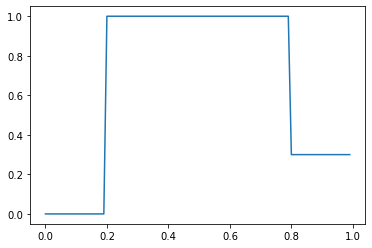

In [51]:
reload(pyide)

alpha=0.2
beta=0.8
mu=0.3

H = lambda x : np.heaviside(x, 1)

g = lambda x : H(x-alpha) - (1-mu)*H(x-beta)

import matplotlib.pyplot as plt

U = np.arange(0, 1, 0.01)

plt.plot(U, g(U))

In [52]:
k = lambda x: 1/2 * np.exp(-np.abs(x))

In [53]:
model = pyide.IDEModel(growthFunction=pyide.GrowthFunction(g),
                  dispersalKernel=pyide.DisperalKernel(k))

In [54]:
# need a block to check hypothesis 5

K_inv = lambda p : np.log(2*p)*H(1/2-p) - np.log(2-2*p)*H(p-1/2)

x_alpha = K_inv(1-alpha)
x_beta =  K_inv(1-beta)
print(x_alpha,x_beta)
w2 = lambda x : 1 - K(x-x_alpha) - (1-mu) * (1-K(x-x_beta))

0.9162907318741553 -0.9162907318741553


In [55]:
X = np.arange(-10, 10, 0.01)
print(np.max(w2(X)), '<', beta)
print(np.max(w2(X)) < beta)

0.6653355268806921 < 0.8
True


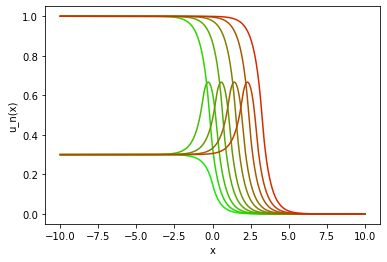

In [75]:
reload(pyide)
sim = pyide.IDESimulation(model)
sim.setDomain(xmin=-10, xmax=10, dx=0.01)
u0 = lambda x : H(-x)

sim.setInitialCondition(u0)
sim.setBoundaryCondition('static')

n = 11
sim.run(n)
sim.plot(times=np.arange(1, n))

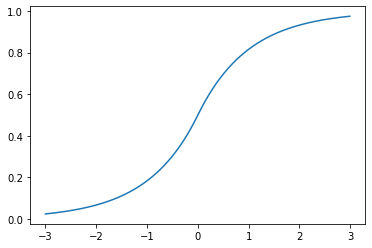

In [48]:
X = np.arange(-3, 3, 0.01)
plt.plot(X, K(X))

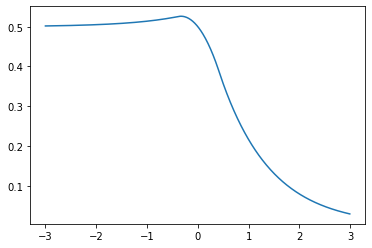

In [39]:
plt.plot(X, w2(X))

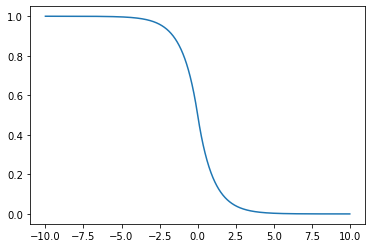

In [57]:
plt.plot(X, w1(X))

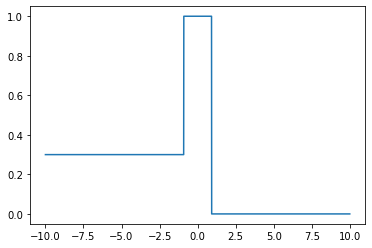

In [58]:
plt.plot(X, g(w1(X)))

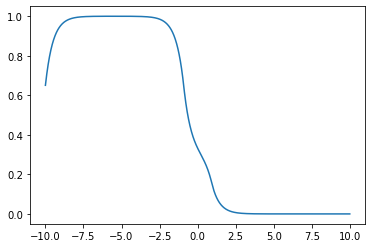

In [63]:
plt.plot(X, sim.Q(sim, g(w1(X)))[1:])